In [29]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from convnwb.paths import Paths
from convnwb.io import get_files, load_jsons_to_df, load_matfile
from scipy.stats import binom_test, chi2_contingency
from spiketools.plts.annotate import add_vlines,add_hlines
from spiketools.plts.data import plot_hist
from spiketools.plts.utils import make_axes
from spiketools.plts.utils import make_grid, get_grid_subplot, save_figure
from spiketools.plts.style import drop_spines
from spiketools.utils.run import create_methods_list

In [30]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)

In [31]:
import sys
sys.path.append('../code')
from utils import get_significant_percentage, get_agreement_percentage
from plts import plot_percentages

sys.path.append('../scripts')
from settings import RUN, PATHS, UNITS,METHODS, SURROGATES

In [32]:
results_folder = PATHS['RESULTS'] / 'units_matlab_sensitivitycheck'
reports_folder = PATHS['REPORTS'] / 'units_matlab_sensitivitycheck'

locations_folder = PATHS['BASE'] / 'localization'/'Loc'
jacksheet_folder = PATHS['BASE'] / 'localization'/'jacksheet'
locations_files = get_files(locations_folder, select='session_data')
jacksheet_files = get_files(jacksheet_folder, select='R1278E')
jacksheet_files


[]

In [33]:
Locations = load_jsons_to_df(locations_files, folder=locations_folder)


In [34]:
# Get the list of files
res_files = get_files(results_folder, select='mat')

In [35]:
# Collect all unit results together into a dataframe
all_results = load_jsons_to_df(res_files, folder=results_folder)

In [36]:
# Check the columns
all_results.columns

Index(['unit_ind', 'session_id', 'label', 'spike_name', 'place_bins',
       'trial_place_bins', 'place_sem', 'trial_fr', 'fr_bins', 'fr_sem',
       's_bins', 'place_info', 'place_fr_info', 'place_anova',
       'place_fr_anova', 'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'place_info_surr_p_val', 'place_info_surr_z_score',
       'place_fr_anova_surr_p_val', 'place_fr_anova_surr_z_score',
       'place_fr_info_surr_p_val', 'place_fr_info_surr_z_score'],
      dtype='object')

In [37]:
# Get total number of units
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))
# Collect numbers of significant cells
analyses = create_methods_list(METHODS)
# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'   
results = {}
for analysis in analyses:
    all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values

for analysis in analyses:
     results[analysis] = sum(all_results['is_' + analysis])


# Compute significance of the counts of detected neurons
stats = {}
for analysis in analyses:
    stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)

Total number of cells: 390


/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/901725631.py:20: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)


In [38]:
# Check the number & percent of significant cells per analysis
print('total cells: {}\n'.format( n_units))
for analysis in analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

total cells: 390

# place_anova cells:     		 83  (21.28%) 		 0.0000
# place_info cells:     		 80  (20.51%) 		 0.0000
# place_fr_anova cells:     		 55  (14.10%) 		 0.0000
# place_fr_info cells:     		 57  (14.62%) 		 0.0000


In [39]:
spike_names = all_results['spike_name']
labels = all_results['label']

In [40]:
all_results['channel'] = spike_names.str.extract(r'(?:NSX|CSC)(\d+)')[0].str.lstrip('0')
all_results['sessions'] = all_results['session_id'].str.extract(r'(\w+)_(\d+)_train_events.mat')[0] + '_' + all_results['session_id'].str.extract(r'(\w+)_(\d+)_train_events.mat')[1]


In [41]:
all_results['location'] = None
for i in range(len(all_results['session_id'])):
    session_id = all_results['sessions'][i]
    channel = int(all_results['channel'][i])
    if session_id in Locations:
        
        if channel in Locations[session_id][0]['LFPChan']:
            # get the index of the channel in the LFPChan list
            channel_idx = Locations[session_id][0]['LFPChan'].index(channel)
            all_results['location'][i] = Locations[session_id][0]['LFPArea'][channel_idx]
            print(f"Location: {all_results['location'][i]}")
        else:
            all_results['location'][i] = None
    else:
        all_results['location'][i] = None

Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: RCA1_2
Location: RCA1_2
Location: RCA1_3
Location: RCA1_3
Location: RCA1_5
Location: RCA1_5
Location: RCA1_11
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_3
Location: LA_4
Location: LA_4
Location: LA_4
Location: LA_4
Location: LA_4
Location: LA_5
Location: LA_5
Location: LA_5
Location: LA_5
Location: LA_6
Location: LA_7
Location: LA_7
Location: LA_7
Location: LA_7
Location: LA_8
Location: LSB_2
Location: LSB_2
Location: LSB_2
Location: LSB_5
Location: LA_2
Location: LA_2
Location: LA_3
Location: LA_5
Location: LA_5
Location: LA_6
Location: LA_7
Location: LA_8
Location: LA_9
Location: LA_12
Location: LA_12
Location: LA_16
Location: LCA1_5
Location: LA_2
Location: LA_5
Location: LA_6
Location: LA_8
Location: LA_11
Location: LA_12
Location: LA_12
Location: LA_12
Location: LA_12
Location: LA_14
Location: LA_16
Location: LA_6
Location: LA_6
Location: LA_8
Location:

/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/2921698974.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_results['location'][i] = None
/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/2921698974.py:1

In [42]:
len(all_results['location'].values[~pd.isna(all_results['location'].values)])



354

In [43]:
# Count occurrences of each anatomical location
# Remove L/R prefix and trailing numbers from location names
all_results['location_clean'] = all_results['location'].str.replace(r'^[LR]|_\d+$', '', regex=True)

# Reorder hippocampal areas together and combine cingulate areas
anatomy_counts = all_results['location_clean'].value_counts()
hippo_areas = ['CA1', 'PHG','SB','DG']  # Only CA1 and PHG
cingulate_areas = ['MC', 'AC']  # Cingulate areas to combine
hippo_counts = anatomy_counts[anatomy_counts.index.isin(hippo_areas)].sum()  # Sum CA1 and PHG counts
cingulate_counts = anatomy_counts[anatomy_counts.index.isin(cingulate_areas)].sum()  # Sum cingulate counts
other_counts = anatomy_counts[~anatomy_counts.index.isin(hippo_areas + cingulate_areas)]
# Create a new Series with the combined counts
anatomy_counts = pd.concat([
    pd.Series({'Hippocampus': hippo_counts, 'Cingulate': cingulate_counts}), 
    other_counts
])

# Calculate total number of cells with valid anatomy 
total_cells = anatomy_counts[~anatomy_counts.index.isna()].sum()
print(f"Total number of cells with valid anatomical locations: {total_cells}")

# Display the counts
print("\nAnatomical Location Counts:")
print("-" * 30)
for location, count in anatomy_counts.items():
    if pd.notna(location):
        print(f"{location}: {int(count)}")

Total number of cells with valid anatomical locations: 354

Anatomical Location Counts:
------------------------------
Hippocampus: 99
Cingulate: 39
EC: 124
A: 79
WM: 10
CS: 3


In [44]:
all_results['firing_rate'] = all_results['place_bins'].apply(lambda x: np.mean(x))

# Print total number of neurons before filtering
print('Total neurons before filtering: \t', len(all_results))

# Print neurons in each firing rate range
print('# neurons fr < 0.1 Hz: \t', sum(all_results.firing_rate < 0.1))
print('# neurons 0.1-0.2 Hz: \t', sum((all_results.firing_rate >= 0.1) & (all_results.firing_rate <= 0.2)))
print('# neurons > 0.2 Hz: \t', sum(all_results.firing_rate > 0.2))

# Set keep_sh flag for neurons above 0.2 Hz
#all_results['keep_sh'] = (all_results['firing_rate'] >= 0.2).values

# Print summary of dropped neurons
#dropped = all_results[~all_results['keep_sh']]
#n_dropped = len(dropped)
#print('\nTotal dropped units (fr <= 0.2): \t{}'.format(n_dropped))
#print('Total kept units (fr > 0.2): \t{}'.format(len(all_results) - n_dropped))

Total neurons before filtering: 	 390
# neurons fr < 0.1 Hz: 	 22
# neurons 0.1-0.2 Hz: 	 25
# neurons > 0.2 Hz: 	 268


In [45]:
#all_results = all_results[all_results['keep_sh']]
all_results

,unit_ind,session_id,label,spike_name,place_bins,trial_place_bins,place_sem,trial_fr,fr_bins,fr_sem,...,place_fr_info_surr_z_score,is_place_anova,is_place_info,is_place_fr_anova,is_place_fr_info,channel,sessions,location,location_clean,firing_rate
0,0,EU001_0_train_events.mat,3ldmicro2,['NSX098_1'],"[10.427083333333334, 10.764082006227833, 11.02...","[[12.499999999999998, 12.212071494184999, 11.7...","[0.5524870158377215, 0.3665329384943979, 0.310...","[[12.5, 13.333333333333332, 10.0, 10.0, 15.0, ...","[10.427083333333334, 11.080357142857142, 11.79...","[0.5524870158377215, 0.7255056637904105, 0.718...",...,-1.122151,False,False,False,False,98,EU001_0,None,None,10.806316
1,1,EU001_0_train_events.mat,3ldmicro2,['NSX098_2'],"[0.359375, 0.5424471938233485, 0.6526270509285...","[[0.0, 0.0, 0.0, 0.0, 0.0, 7.592261936796192e-...","[0.10508828947120785, 0.07284210680590783, 0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.359375, 0.5859375, 1.1436011904761902, 0.42...","[0.10508828947120785, 0.15913108494542882, 0.2...",...,-1.070045,False,False,False,False,98,EU001_0,None,None,0.686640
2,2,EU001_0_train_events.mat,3ldmicro3,['NSX099_1'],"[1.1328125, 1.1301613675915834, 1.145428665620...","[[0.0, 0.0, 0.0, 0.0, 3.7302162099486296e-06, ...","[0.20229463312532192, 0.1290725551048585, 0.10...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.1328125, 1.2777157738095235, 1.050223214285...","[0.20229463312532192, 0.37543120141211933, 0.2...",...,-0.952754,False,False,False,False,99,EU001_0,None,None,1.310328
3,3,EU001_0_train_events.mat,3ldmicro3,['NSX099_2'],"[0.27343749999999994, 0.43395843885172125, 0.4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.19229852214370324, 0.14320724683705446, 0.1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.2734375, 0.42782738095238093, 0.63504464285...","[0.1922985221437033, 0.23943885253562658, 0.28...",...,-0.972062,False,False,False,False,99,EU001_0,None,None,0.474005
4,4,EU001_0_train_events.mat,3ldmicro4,['NSX100_1'],"[6.872395833333333, 6.96062905301727, 6.812296...","[[7.499999999999998, 7.064840108765245, 6.0835...","[0.7441425473646428, 0.4741570658129946, 0.387...","[[7.5, 3.333333333333333, 15.0, 0.0, 0.0, 0.0,...","[6.872395833333333, 7.319010416666667, 8.01041...","[0.7441425473646429, 1.0634116332105883, 1.152...",...,2.249915,True,True,True,True,100,EU001_0,None,None,6.127692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,6,R1391T_0_train_events.mat,LB3,['NSX007_3'],"[1.1328125, 0.9735987291347866, 0.750897071175...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.5844504241411829, 0.4165799131869477, 0.263...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.1328125, 1.0026041666666665, 0.559895833333...","[0.5844504241411829, 0.4239994763305115, 0.269...",...,-0.292112,False,False,False,False,7,R1391T_0,None,None,0.654275
386,0,R1414E_0_train_events.mat,3Ldmicro8,['NSX104_1'],"[6.7265625, 6.94370454023854, 7.07753339446850...","[[5.999999999999999, 6.604969819249194, 6.5327...","[0.5247685603493718, 0.4128752767823338, 0.386...","[[6.0, 5.0, 13.333333333333332, 0.0, 0.0, 0.0,...","[6.7265625, 7.1789434523809526, 7.257440476190...","[0.5247685603493719, 0.611465239634213, 0.6896...",...,0.220860,False,False,False,False,104,R1414E_0,REC_8,EC,7.449392
387,0,R1414E_1_train_events.mat,3Ldmicro8,['NSX104_1'],"[14.171875, 14.462794784764867, 14.94048334658...","[[9.999999999999998, 8.299562107664952, 6.7013...","[0.6900006678481256, 0.4443091186391409, 0.422...","[[10.0, 3.333333333333333, 10.0, 0.0, 10.0, 16...","[14.171875, 13.749627976190471, 15.44122023809...","[0.6900006678481256, 0.8282075551193356, 0.868...",...,2.132578,False,False,True,True,104,R1414E_1,REC_8,EC,NaN
388,1,R1414E_1_train_events.mat,3Ldmicro8,['NSX104_2'],"[9.890624999999998, 9.823433873680518, 9.63824...","[[11.999999999999998, 12.161161603248255, 13.5...","[0.6483404247742727, 0.4222441240082739, 0.356...","[[1

In [46]:
all_results = all_results.dropna()
place_info = all_results['place_fr_info']
place_anova = all_results['place_fr_anova']
place_info_surr_p_val =  all_results['place_fr_info_surr_p_val']
place_anova_surr_p_val =  all_results['place_fr_anova_surr_p_val']



In [47]:
all_results['location_clean'] = all_results['location_clean'].replace(['CA1', 'PHG','SB','DG'], 'H')
all_results['location_clean'] = all_results['location_clean'].replace(['MC', 'AC'], 'C')
#all_results['location_clean'] = all_results['location_clean'].replace(['None','Unknown'], 'Unknown')
# Calculate percentage of significant place cells by spatial information for each region
region_sig_info = all_results[all_results['place_info_surr_p_val'] < 0.05].groupby('location_clean')['unit_ind'].count()
region_total_info = all_results.groupby('location_clean')['unit_ind'].count()
region_percentages_info = (region_sig_info / region_total_info * 100).round(2)
# Calculate percentage of significant place cells by anova for each region
region_sig_anova = all_results[all_results['place_anova_surr_p_val'] < 0.05].groupby('location_clean')['unit_ind'].count()
region_total_anova = all_results.groupby('location_clean')['unit_ind'].count()
region_percentages_anova = (region_sig_anova / region_total_anova * 100).round(2)

region_sig_info_threshold = all_results[all_results['place_info'] > 0.25].groupby('location_clean')['unit_ind'].count()
region_total_info_threshold = all_results.groupby('location_clean')['unit_ind'].count()
region_percentages_info_threshold = (region_sig_info_threshold / region_total_info_threshold * 100).round(2)



/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/4032772986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['location_clean'] = all_results['location_clean'].replace(['CA1', 'PHG','SB','DG'], 'H')
/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/4032772986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['location_clean'] = all_results['location_clean'].replace(['MC', 'AC'], 'C')


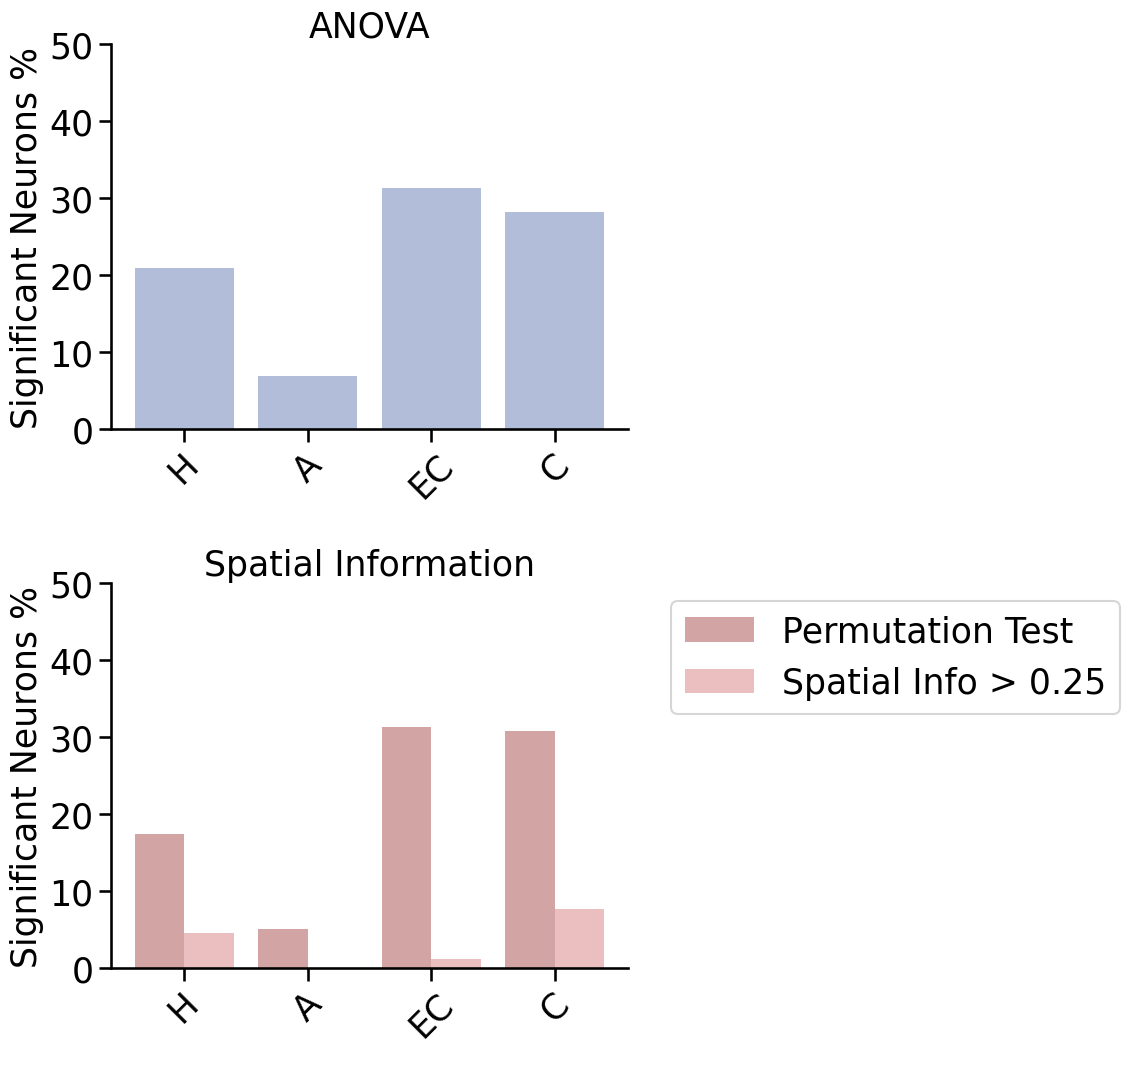

In [48]:
grid = make_grid(2, 2, wspace=.4, hspace=.4, figsize=(16, 12))

plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 25,
    'axes.labelsize': 25,
    'legend.fontsize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25
})
ax=get_grid_subplot(grid,1, 0)

# Filter out WM and CS
region_percentages_info_filtered = region_percentages_info[~region_percentages_info.index.isin(['WM', 'CS'])]
region_percentages_anova_filtered = region_percentages_anova[~region_percentages_anova.index.isin(['WM', 'CS'])]
region_percentages_info_threshold_filtered = region_percentages_info_threshold[~region_percentages_info_threshold.index.isin(['WM', 'CS'])]

# Reorder regions
desired_order = ['H', 'A', 'EC', 'C']
region_percentages_info_filtered = region_percentages_info_filtered.reindex(desired_order)
region_percentages_anova_filtered = region_percentages_anova_filtered.reindex(desired_order)
region_percentages_info_threshold_filtered = region_percentages_info_threshold_filtered.reindex(desired_order)

x = np.arange(len(region_percentages_info_filtered))
width = 0.8

# Plot for spatial information
ax.bar(x - width/4, region_percentages_info_filtered, width/2, label='Permutation Test', color='#c78e8e', alpha=0.8)
ax.bar(x + width/4, region_percentages_info_threshold_filtered, width/2, label='Spatial Info > 0.25', color='#e6b0b0', alpha=0.8)
ax.set_ylabel('Significant Neurons %')
ax.set_xticks(x)
ax.set_xticklabels(region_percentages_info_filtered.index, rotation=45)
ax.set_xlabel(' ')
ax.set_title('Spatial Information')
ax.set_ylim(0, 50) # Increased y-limit to accommodate labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax=get_grid_subplot(grid,0, 0)

# Plot for ANOVA
ax.bar(x, region_percentages_anova_filtered, width, label='ANOVA', color='#7f94c0', alpha=0.6)

ax.set_ylabel('Significant Neurons %')
ax.set_xticks(x)
ax.set_xticklabels(region_percentages_anova_filtered.index, rotation=45)
ax.set_xlabel(' ')
ax.set_title('ANOVA')
ax.set_ylim(0, 50) # Increased y-limit to accommodate labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
save_figure('ANATOMY_REGION_SIGNIFICANCE_Smooth',file_path='/Users/weijiazhang/Plots/PLDM/Human')

## Check Results

In [21]:
# Get total number of units
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))
# Collect numbers of significant cells
analyses = create_methods_list(METHODS)
# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'   
results = {}
for analysis in analyses:
    all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values


Total number of cells: 279


/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/3303125948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values


In [22]:
# Collect numbers of significant cells
results = {}
for analysis in analyses:
    all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values
for analysis in analyses:
     results[analysis] = sum(all_results['is_' + analysis])
# Compute significance of the counts of detected neurons
stats = {}
for analysis in analyses:
    stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)

/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/373076076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values
/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/373076076.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)


In [23]:
all_results.columns

Index(['unit_ind', 'session_id', 'label', 'spike_name', 'place_bins',
       'trial_place_bins', 'place_sem', 'trial_fr', 'fr_bins', 'fr_sem',
       's_bins', 'place_info', 'place_fr_info', 'place_anova',
       'place_fr_anova', 'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'place_info_surr_p_val', 'place_info_surr_z_score',
       'place_fr_anova_surr_p_val', 'place_fr_anova_surr_z_score',
       'place_fr_info_surr_p_val', 'place_fr_info_surr_z_score',
       'is_place_anova', 'is_place_info', 'is_place_fr_anova',
       'is_place_fr_info', 'channel', 'sessions', 'location', 'location_clean',
       'firing_rate'],
      dtype='object')

In [24]:
print('total cells: {}\n'.format( n_units))
for analysis in analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

total cells: 279

# place_anova cells:     		 60  (21.51%) 		 0.0000
# place_info cells:     		 56  (20.07%) 		 0.0000
# place_fr_anova cells:     		 40  (14.34%) 		 0.0000
# place_fr_info cells:     		 40  (14.34%) 		 0.0000


In [25]:
anova_fr_steps,anova_fr_significant_percentages = get_significant_percentage(all_results['place_fr_anova'].values,all_results['place_fr_anova_surr_p_val'].values,increment = anova_increment,threshold = 0.05)
info_fr_steps,info_fr_significant_percentages = get_significant_percentage(all_results['place_fr_info'].values,all_results['place_fr_info_surr_p_val'].values,increment = info_increment,threshold = 0.05)
anova_fr_categories, anova_fr_agreement_percentages, anova_fr_agree_significant_percentages, anova_fr_agree_not_significant_percentages = get_agreement_percentage(all_results['place_fr_anova'].values,all_results['place_fr_anova_surr_p_val'].values,all_results['place_fr_info_surr_p_val'].values,increment=anova_increment)
info_fr_categories, info_fr_agreement_percentages, info_fr_agree_significant_percentages, info_fr_agree_not_significant_percentages = get_agreement_percentage(all_results['place_fr_info'].values,all_results['place_fr_info_surr_p_val'].values,all_results['place_fr_anova_surr_p_val'].values,increment=info_increment)

NameError: name 'anova_increment' is not defined

In [27]:
anova_steps,anova_significant_percentages = get_significant_percentage(all_results['place_anova'].values,all_results['place_anova_surr_p_val'].values,increment = 0.2,threshold = 0.05)
info_steps,info_significant_percentages = get_significant_percentage(all_results['place_info'].values,all_results['place_info_surr_p_val'].values,increment = 0.2,threshold = 0.05)
anova_categories, anova_agreement_percentages, anova_agree_significant_percentages, anova_agree_not_significant_percentages = get_agreement_percentage(all_results['place_anova'].values,all_results['place_anova_surr_p_val'].values,all_results['place_info_surr_p_val'].values,increment=.2)
info_categories, info_agreement_percentages, info_agree_significant_percentages, info_agree_not_significant_percentages = get_agreement_percentage(all_results['place_info'].values,all_results['place_info_surr_p_val'].values,all_results['place_anova_surr_p_val'].values,increment=.2)


/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/4281521514.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


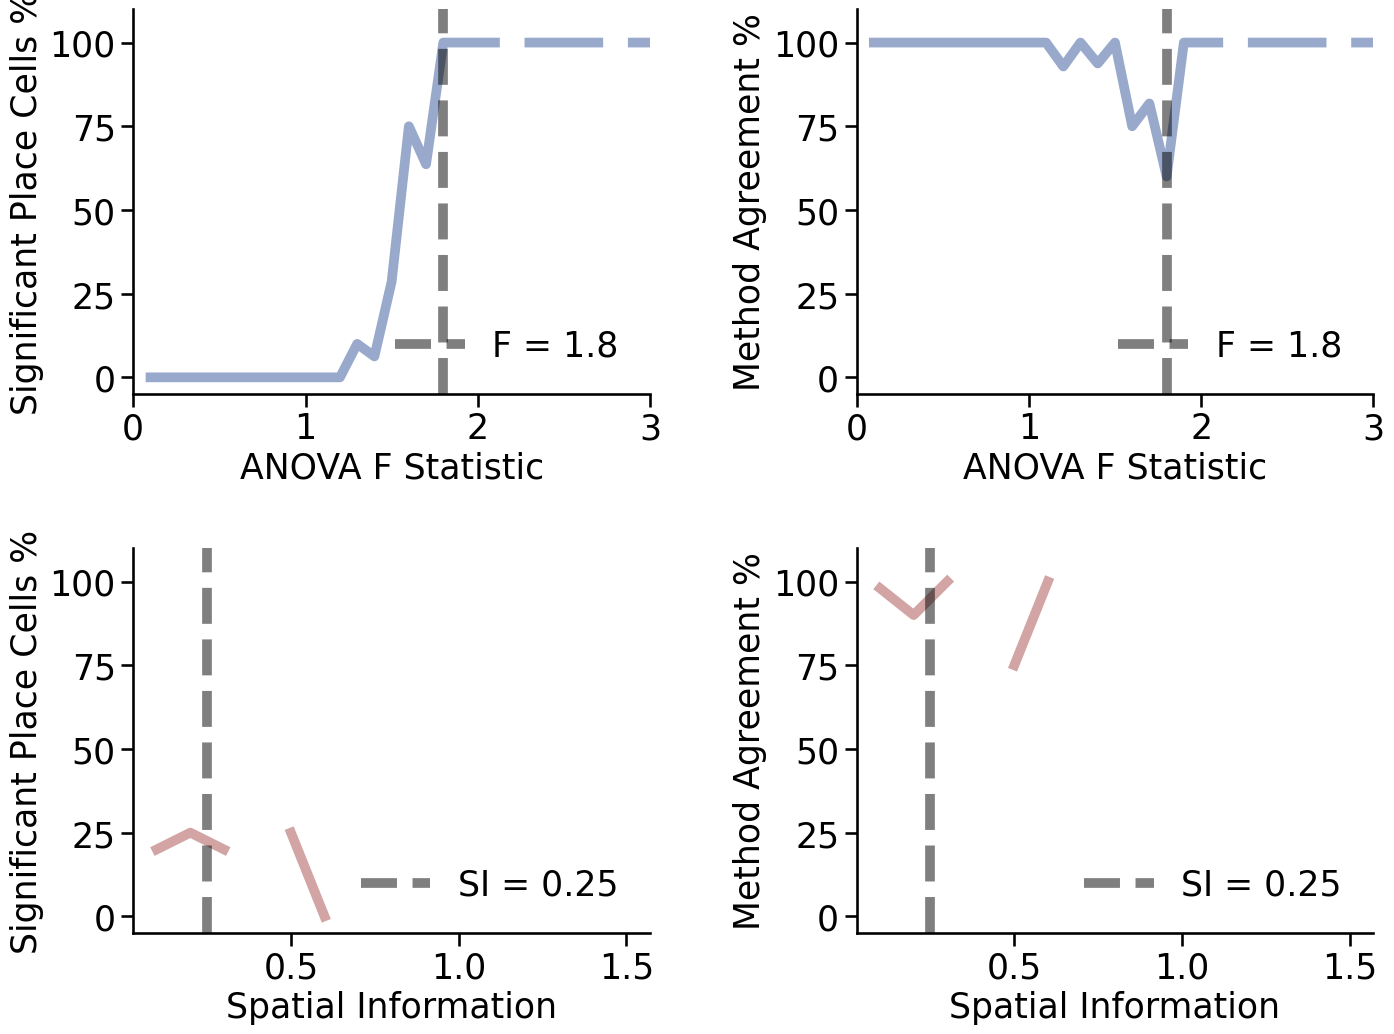

In [26]:
info_increment = .1
anova_increment = .1

info_steps, info_significant_percentages = get_significant_percentage(all_results['place_info'].values,all_results['place_info_surr_p_val'].values,increment=info_increment)
anova_steps, anova_significant_percentages = get_significant_percentage(all_results['place_anova'].values,all_results['place_anova_surr_p_val'].values,increment=anova_increment)
info_categories, info_agreement_percentages, _, _ = get_agreement_percentage(all_results['place_info'].values,all_results['place_info_surr_p_val'].values,all_results['place_anova_surr_p_val'].values,increment=info_increment)
anova_categories, anova_agreement_percentages, _, _= get_agreement_percentage(all_results['place_anova'].values,all_results['place_anova_surr_p_val'].values,all_results['place_info_surr_p_val'].values,increment=anova_increment)


grid = make_grid(2, 2, wspace=.4, hspace=.4, figsize=(16, 12))

plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 25,
    'axes.labelsize': 25,
    'legend.fontsize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25
})

# Define consistent colors
anova_color = '#7f94c0'  # Deep blue for ANOVA
info_color = '#c78e8e'   # Deep red for Spatial Info
threshold_color = '#000000'  # Black for threshold lines
lw = 7

# ANOVA Significance Plot
ax = get_grid_subplot(grid, 0, 0)
plot_percentages(anova_steps, anova_significant_percentages, 
                 xlim=[-0,3],ylim=[-5,110],
                ylabel='Significant Place Cells %',
                xlabel='ANOVA F Statistic',
                color=anova_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(1.8, color=threshold_color, linestyle='--',alpha=0.5, lw=lw, label='F = 1.8')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])

# ANOVA Agreement Plot  
ax = get_grid_subplot(grid, 0, 1)
plot_percentages(anova_steps, anova_agreement_percentages,
                 xlim=[-0,3],ylim=[-5,110],
                ylabel='Method Agreement %', 
                xlabel='ANOVA F Statistic',
                color=anova_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(1.8, color=threshold_color, linestyle='--', lw=lw, alpha=0.5, label='F = 1.8')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])

# Spatial Information Significance Plot
ax = get_grid_subplot(grid, 1, 0)
plot_percentages(info_steps, info_significant_percentages,
                 ylim=[-5,110],
                ylabel='Significant Place Cells %',
                xlabel='Spatial Information',
                color=info_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(0.25, color=threshold_color, linestyle='--', lw=lw, alpha=0.5, label='SI = 0.25')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])

# Spatial Information Agreement Plot
ax = get_grid_subplot(grid, 1, 1)
plot_percentages(info_steps, info_agreement_percentages,
              ylim=[-5,110],
                ylabel='Method Agreement %',
                xlabel='Spatial Information', 
                color=info_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(0.25, color=threshold_color, linestyle='--', lw=lw, alpha=0.5, label='SI = 0.25')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])
save_figure('Percentage_Significance_Agreement',file_path='/Users/weijiazhang/Plots/PLDM/Human')

plt.tight_layout()



/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_2658/582995811.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


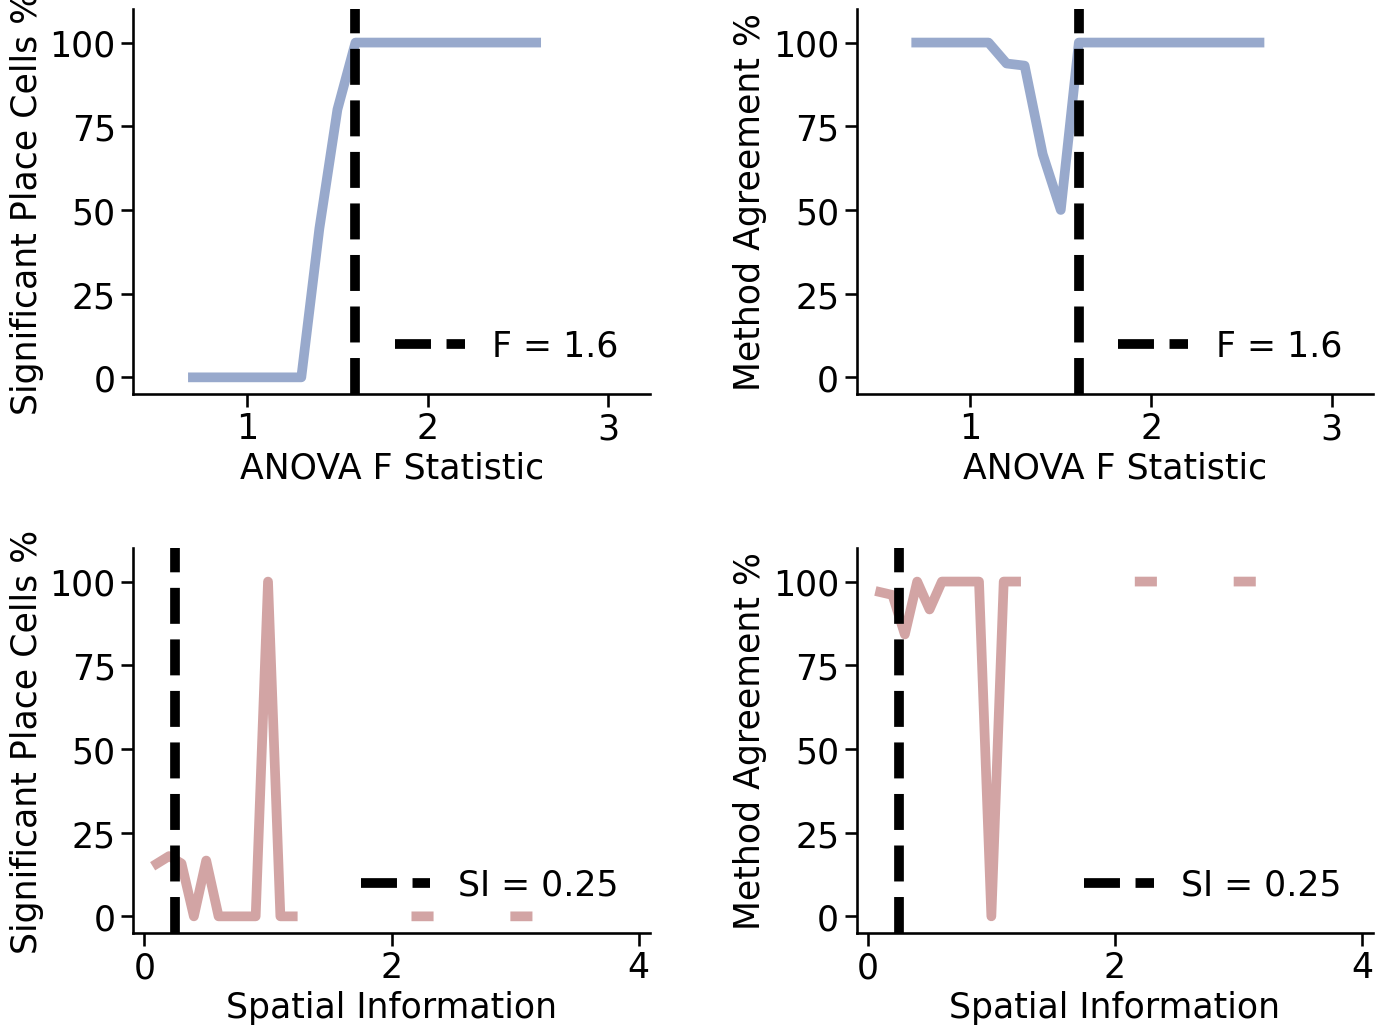

In [27]:
anova_fr_steps,anova_fr_significant_percentages = get_significant_percentage(all_results['place_fr_anova'].values,all_results['place_fr_anova_surr_p_val'].values,increment = anova_increment,threshold = 0.05)
info_fr_steps,info_fr_significant_percentages = get_significant_percentage(all_results['place_fr_info'].values,all_results['place_fr_info_surr_p_val'].values,increment = info_increment,threshold = 0.05)
anova_fr_categories, anova_fr_agreement_percentages, anova_fr_agree_significant_percentages, anova_fr_agree_not_significant_percentages = get_agreement_percentage(all_results['place_fr_anova'].values,all_results['place_fr_anova_surr_p_val'].values,all_results['place_fr_info_surr_p_val'].values,increment=anova_increment)
info_fr_categories, info_fr_agreement_percentages, info_fr_agree_significant_percentages, info_fr_agree_not_significant_percentages = get_agreement_percentage(all_results['place_fr_info'].values,all_results['place_fr_info_surr_p_val'].values,all_results['place_fr_anova_surr_p_val'].values,increment=info_increment)

grid = make_grid(2, 2, wspace=.4, hspace=.4, figsize=(16, 12))

plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 25,
    'axes.labelsize': 25,
    'legend.fontsize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25
})

# Define consistent colors
anova_color = '#7f94c0'  # Deep blue for ANOVA
info_color = '#c78e8e'   # Deep red for Spatial Info
threshold_color = '#000000'  # Black for threshold lines
lw = 7  

# ANOVA Significance Plot
ax = get_grid_subplot(grid, 0, 0)
plot_percentages(anova_fr_steps, anova_fr_significant_percentages, 
                 ylim=[-5,110],
                ylabel='Significant Place Cells %',
                xlabel='ANOVA F Statistic',
                color=anova_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(1.6, color=threshold_color, linestyle='--', lw=lw, label='F = 1.6')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])

# ANOVA Agreement Plot  
ax = get_grid_subplot(grid, 0, 1)
plot_percentages(anova_fr_steps, anova_fr_agreement_percentages,
                ylim=[-5,110],
                ylabel='Method Agreement %', 
                xlabel='ANOVA F Statistic',
                color=anova_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(1.6, color=threshold_color, linestyle='--', lw=lw, label='F = 1.6')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])

# Spatial Information Significance Plot
ax = get_grid_subplot(grid, 1, 0)
plot_percentages(info_fr_steps, info_fr_significant_percentages,
                 ylim=[-5,110],
                ylabel='Significant Place Cells %',
                xlabel='Spatial Information',
                color=info_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(0.25, color=threshold_color, linestyle='--', lw=lw, label='SI = 0.25')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])

# Spatial Information Agreement Plot
ax = get_grid_subplot(grid, 1, 1)
plot_percentages(info_fr_steps, info_fr_agreement_percentages,
                 ylim=[-5,110],
                ylabel='Method Agreement %',
                xlabel='Spatial Information', 
                color=info_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(0.25, color=threshold_color, linestyle='--', lw=lw, label='SI = 0.25')
ax.legend(frameon=False, loc='lower right')

drop_spines(['top','right'])
save_figure('Percentage_Significance_Agreement_FR',file_path='/Users/weijiazhang/Plots/PLDM/Human')

plt.tight_layout()


In [30]:
place_info_fr_surr_p_val = all_results['place_fr_info_surr_p_val']
place_anova_fr_surr_p_val = all_results['place_fr_anova_surr_p_val']

place_anova_surr_p_val = all_results['place_anova_surr_p_val']
place_info_surr_p_val = all_results['place_info_surr_p_val']


True positives: 52 (22.2%)
False positives: 2 (0.9%)
False negatives: 5 (2.1%)
True negatives: 175 (74.8%)
Phi correlation coefficient: 0.92


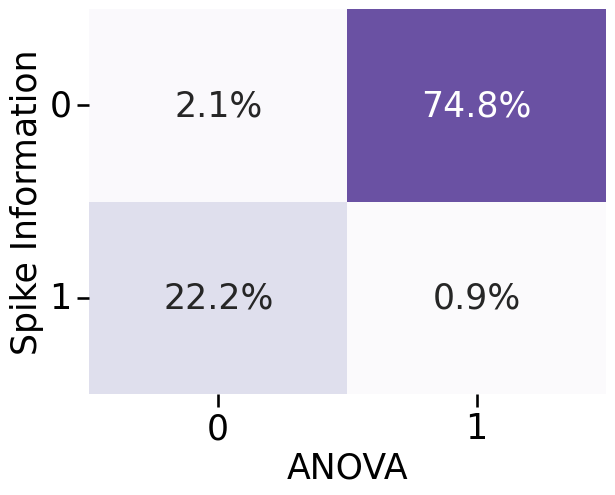

In [31]:
threshold = 0.05
significant_spike_info = (place_info_surr_p_val < threshold)
significant_anova = (place_anova_surr_p_val < threshold)

total_cells = len(significant_spike_info)

# True positive: Significant in both
tp = np.sum(significant_spike_info & significant_anova)
tp_pct = (tp/total_cells)*100
print(f"True positives: {tp} ({tp_pct:.1f}%)")

# False positive: Significant in Spike Info, not in ANOVA
fp = np.sum(significant_spike_info & ~significant_anova) 
fp_pct = (fp/total_cells)*100
print(f"False positives: {fp} ({fp_pct:.1f}%)")

# False negative: Not significant in Spike Info, significant in ANOVA
fn = np.sum(~significant_spike_info & significant_anova)
fn_pct = (fn/total_cells)*100
print(f"False negatives: {fn} ({fn_pct:.1f}%)")

# True negative: Not significant in both
tn = np.sum(~significant_spike_info & ~significant_anova)
tn_pct = (tn/total_cells)*100
print(f"True negatives: {tn} ({tn_pct:.1f}%)")

# Creating a 2x2 matrix with percentages
data = np.array([
    [fn, tn],
    [tp, fp]
])

data_pct = np.array([
    [fn_pct, tn_pct],
    [tp_pct, fp_pct]
])

# Creating a DataFrame for the heatmap with counts and percentages
df = pd.DataFrame(data_pct, index=['N.S.', '*'],
                  columns=['*', 'N.S.'])

# Add subplot to grid and plot heatmap
grid = make_grid(2, 2, wspace=.4, hspace=.4, figsize=(16, 12))
ax = get_grid_subplot(grid,0, 0)
# Plotting the heatmap

heatmap = sns.heatmap( data_pct, annot=True, fmt='.1f', cmap='Purples', vmin=0, vmax=100, ax=ax, cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
heatmap.set_xlabel('ANOVA')
heatmap.set_ylabel('Spike Information')
#heatmap.set_title('Average of Forward and Backward')
# Add % symbol to annotations
for t in heatmap.texts:
    t.set_text(t.get_text() + '%')

def phi_coefficient(a, b, c, d):
    numerator = (a * d) - (b * c)
    denominator = np.sqrt((a + b) * (a + c) * (b + d) * (c + d))
    phi = numerator / denominator
    return phi

phi = phi_coefficient(tp, fp, fn, tn)
print(f'Phi correlation coefficient: {phi:.2f}')

# Save figure before showing
plt.savefig('/Users/weijiazhang/Plots/PLDM/Human/Train_two_by_two_matrix.pdf', 
            dpi=300, bbox_inches='tight')
plt.show()

True positives: 34 (14.5%)
False positives: 5 (2.1%)
False negatives: 6 (2.6%)
True negatives: 189 (80.8%)
Phi correlation coefficient: 0.83


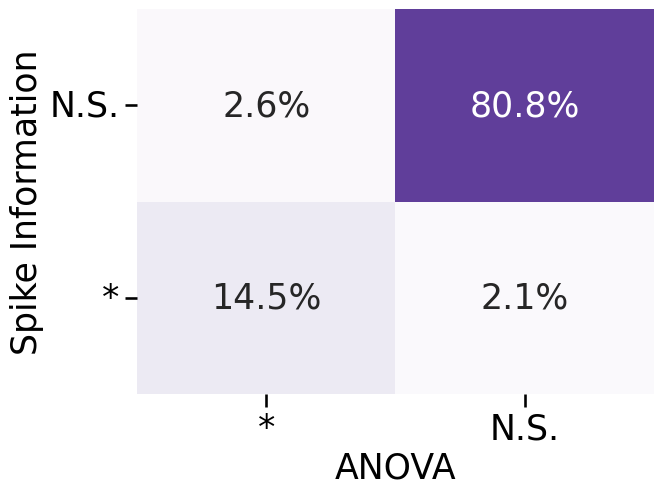

In [32]:
threshold = 0.05
significant_spike_info = (place_info_fr_surr_p_val < threshold)
significant_anova = (place_anova_fr_surr_p_val < threshold)

total_cells = len(significant_spike_info)

# True positive: Significant in both
tp = np.sum(significant_spike_info & significant_anova)
tp_pct = (tp/total_cells)*100
print(f"True positives: {tp} ({tp_pct:.1f}%)")

# False positive: Significant in Spike Info, not in ANOVA
fp = np.sum(significant_spike_info & ~significant_anova) 
fp_pct = (fp/total_cells)*100
print(f"False positives: {fp} ({fp_pct:.1f}%)")

# False negative: Not significant in Spike Info, significant in ANOVA
fn = np.sum(~significant_spike_info & significant_anova)
fn_pct = (fn/total_cells)*100
print(f"False negatives: {fn} ({fn_pct:.1f}%)")

# True negative: Not significant in both
tn = np.sum(~significant_spike_info & ~significant_anova)
tn_pct = (tn/total_cells)*100
print(f"True negatives: {tn} ({tn_pct:.1f}%)")

# Creating a 2x2 matrix with percentages
data = np.array([
    [fn, tn],
    [tp, fp]
])

data_pct = np.array([
    [fn_pct, tn_pct],
    [tp_pct, fp_pct]
])

# Creating a DataFrame for the heatmap with counts and percentages
df = pd.DataFrame(data_pct, index=['N.S.', '*'],
                  columns=['*', 'N.S.'])

# Add subplot to grid and plot heatmap
grid = make_grid(2, 2, wspace=.4, hspace=.4, figsize=(16, 12))
# Plotting the heatmap
ax = get_grid_subplot(grid, 0, 1)
heatmap = sns.heatmap(df, annot=True, fmt='.1f', cmap='Purples', vmin=0, vmax=100, ax=ax, cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
heatmap.set_xlabel('ANOVA')
heatmap.set_ylabel('Spike Information')
#heatmap.set_title('Average of Forward and Backward')
# Add % symbol to annotations
for t in heatmap.texts:
    t.set_text(t.get_text() + '%')

def phi_coefficient(a, b, c, d):
    numerator = (a * d) - (b * c)
    denominator = np.sqrt((a + b) * (a + c) * (b + d) * (c + d))
    phi = numerator / denominator
    return phi

phi = phi_coefficient(tp, fp, fn, tn)
print(f'Phi correlation coefficient: {phi:.2f}')

# Save figure before showing
plt.savefig('/Users/weijiazhang/Plots/PLDM/Human/Train_two_by_two_matrix_FR.pdf', 
            dpi=300, bbox_inches='tight')

